### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from the csv files

In [2]:
data = pd.read_csv("cars1.csv")

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


### Dropping unnecessary columns


In [4]:
data.drop(data.columns[9:14], inplace = True, axis = 1)

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


### Visualizing data

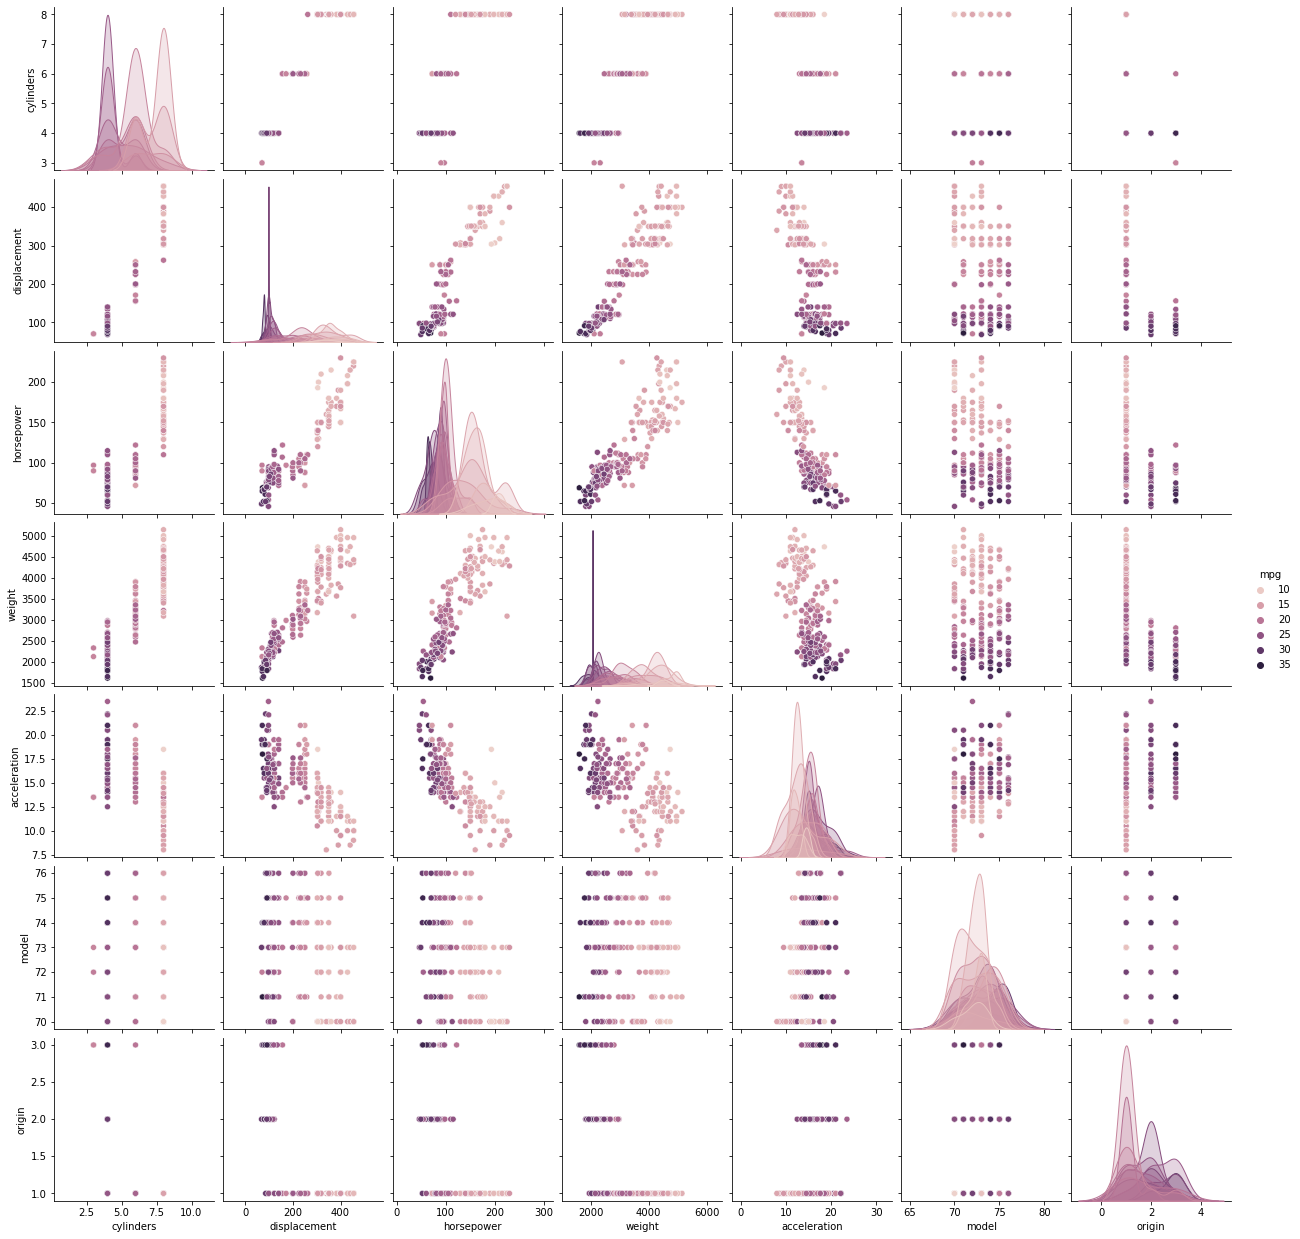

In [6]:
sns.pairplot(data,hue = 'mpg')

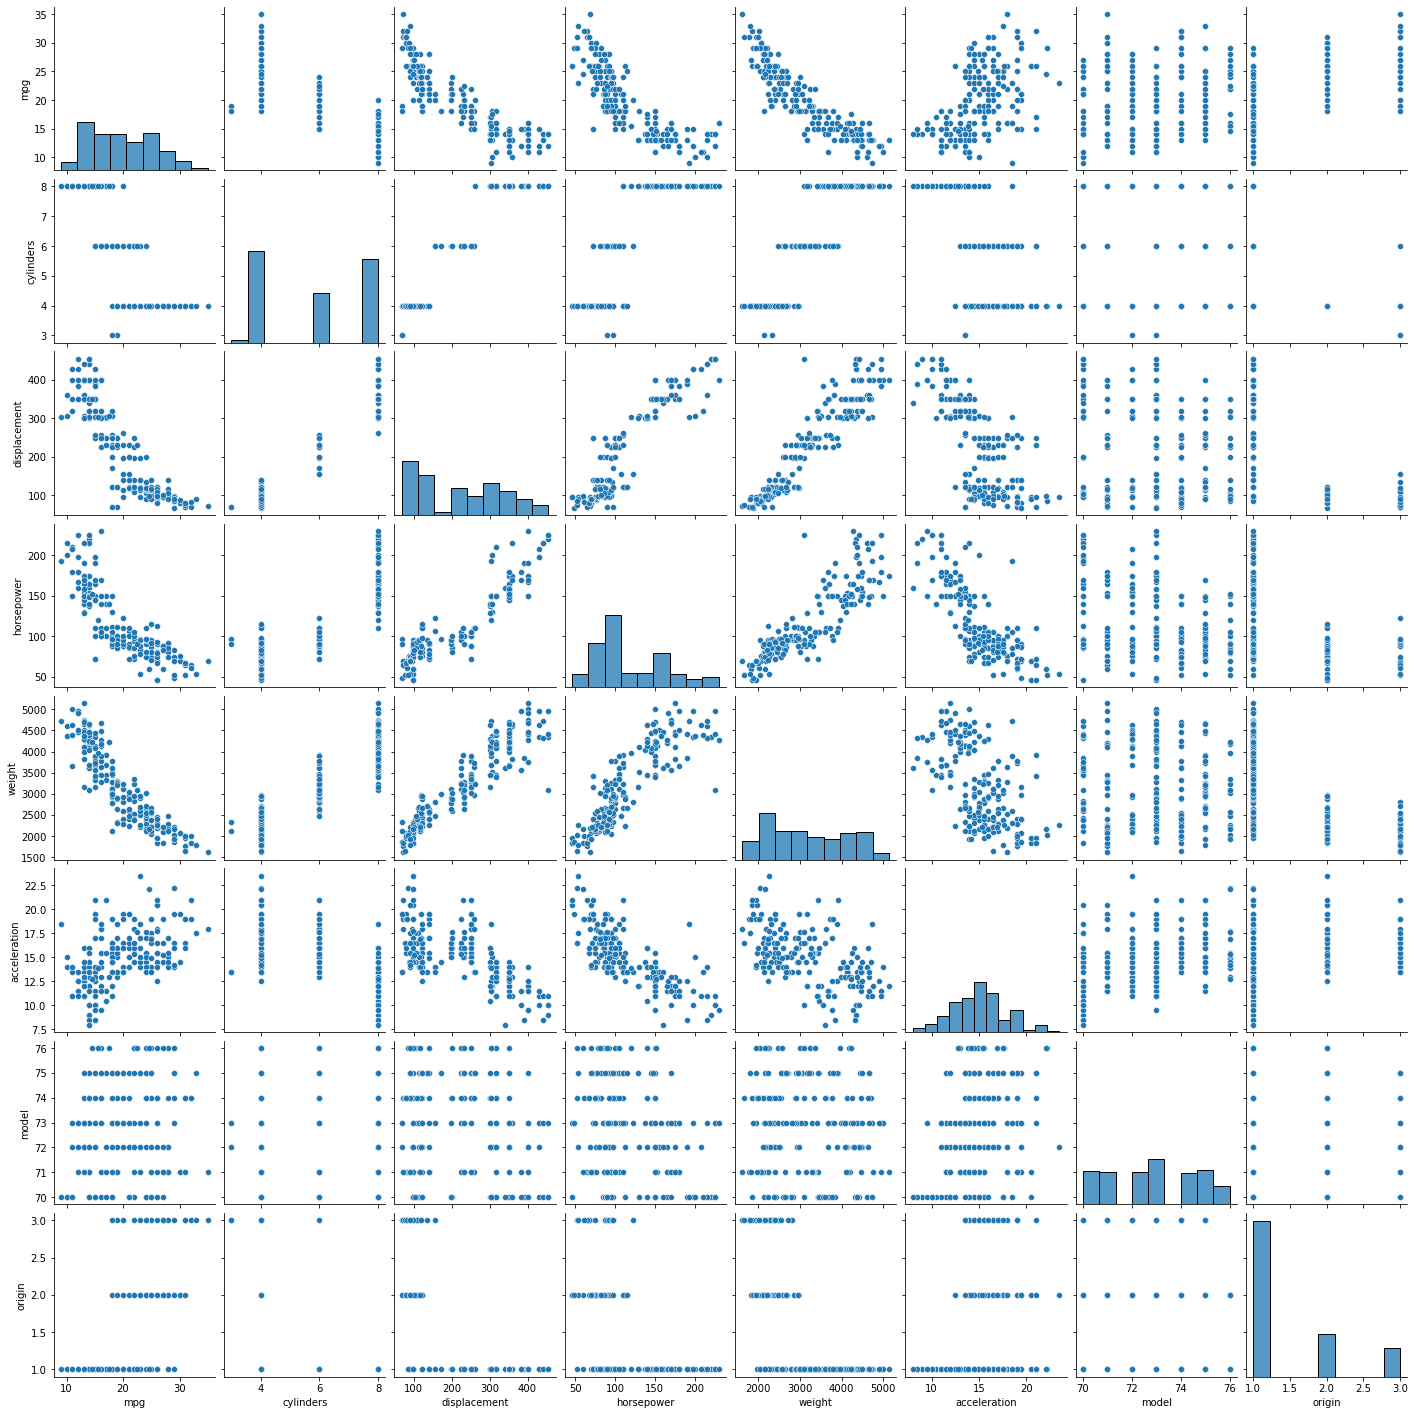

In [7]:
sns.pairplot(data)

<AxesSubplot:>

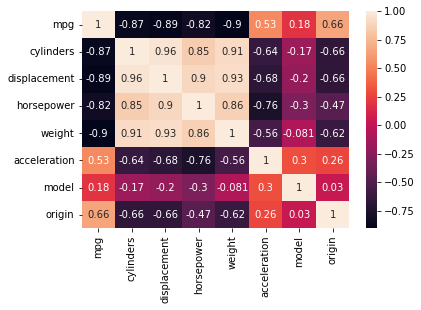

In [8]:
sns.heatmap(data.corr(),annot = True)


### Fitting multi-linear Regression model for the given data. Predicting label as mpg which denotes 'Miles Per Gallons' 

### Preprocessing the data and splitting data into dependent and independent variables.


In [9]:
y = data.iloc[:,0]

In [10]:
pd.DataFrame(y)

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
193,24.0
194,22.5
195,29.0
196,24.5


In [11]:
x = data.iloc[:,1:8]

In [12]:
x

,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,8,307,130,3504,12.0,70,1
1,8,350,165,3693,11.5,70,1
2,8,318,150,3436,11.0,70,1
3,8,304,150,3433,12.0,70,1
4,8,302,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
193,6,200,81,3012,17.6,76,1
194,6,232,90,3085,17.6,76,1
195,4,85,52,2035,22.2,76,1
196,4,98,60,2164,22.1,76,1


### Preprocessing the data with standard scaler

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
x = ss.fit_transform(x)

In [20]:
pd.DataFrame(x)

,0,1,2,3,4,5,6
0,1.179744,0.727047,0.321858,0.349747,-1.049016,-1.514650,-0.622111
1,1.179744,1.101319,1.129708,0.552445,-1.223529,-1.514650,-0.622111
2,1.179744,0.822791,0.783487,0.276818,-1.398041,-1.514650,-0.622111
3,1.179744,0.700935,0.783487,0.273601,-1.049016,-1.514650,-0.622111
4,1.179744,0.683527,0.552672,0.290761,-1.572554,-1.514650,-0.622111
...,...,...,...,...,...,...,...
193,0.056718,-0.204280,-0.809133,-0.177912,0.905528,1.710089,-0.622111
194,0.056718,0.074248,-0.601400,-0.099621,0.905528,1.710089,-0.622111
195,-1.066307,-1.205239,-1.478495,-1.225723,2.511045,1.710089,-0.622111
196,-1.066307,-1.092087,-1.293843,-1.087373,2.476143,1.710089,-0.622111


## Linear Model 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.8505746387336575

In [34]:
lr.predict([[0.056718,-0.204280,-0.809133,-0.177912,0.905528,1.710089,-0.622111]])

array([20.73873829])

In [45]:
lr.intercept_


19.724991460652447

In [46]:
lr.coef_

array([-0.44482898, -0.54525412, -0.3710289 , -3.61271539, -0.29984963,
        0.45264215,  0.83248992])

### Linear Model without Standardization 

In [35]:
x1 = data.iloc[:,1:8]

In [36]:
x1

,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,8,307,130,3504,12.0,70,1
1,8,350,165,3693,11.5,70,1
2,8,318,150,3436,11.0,70,1
3,8,304,150,3433,12.0,70,1
4,8,302,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
193,6,200,81,3012,17.6,76,1
194,6,232,90,3085,17.6,76,1
195,4,85,52,2035,22.2,76,1
196,4,98,60,2164,22.1,76,1


In [37]:
lr1 = LinearRegression()

In [38]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y, test_size = 0.2, random_state = 42)

In [39]:
lr1.fit(x1_train,y1_train)

LinearRegression()

In [40]:
y1_pred = lr1.predict(x1_test)

In [42]:
r2_score(y1_test,y1_pred
        )

0.8505746387336575

In [43]:
lr1.intercept_

17.724746713253495

In [44]:
lr1.coef_

array([-0.24977722, -0.00474589, -0.00856388, -0.00387456, -0.1046552 ,
        0.24327543,  1.17867224])

### For this example as we can see that there is no change in r2_score. So standardization doesn't play any significant role. 
### But there is a change in intercept and coeffecient as the parameters have been changed